# make a data frame fpkm vales
#Import a lot of things... omg


## Part 1

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

df = pd.read_csv('/Users/cmdb/qbb2020-answers/QUANT2020/data/lab7/all_annotated.csv')

In [2]:
import seaborn as sns

In [3]:
df['median']= df.median(axis=1) #make a median column

In [4]:
df =df.loc[df['median'] > 0] #Filter values out that are median <0
len(df)

8613

In [5]:
dfmath=df #copy df for doing transformations

Apply a log2(FPKM + 0.1) transformation to the data.

In [6]:
import math #Apply a log2(FPKM + 0.1) transformation to the data.
dfmath[dfmath.columns[2:-1]] = np.log2(dfmath[dfmath.columns[2:-1]] + 0.1)

In [7]:
transcriptcomp = linkage(dfmath[dfmath.columns[2:-1][:]]) #compare/cluster all the transcripts to eachothers

In [8]:
len(transcriptcomp)

8612

In [9]:
transc_leaves =leaves_list(transcriptcomp) #transcripts cluster order

In [10]:
len(transc_leaves)

8613

In [11]:
dfFLIP = dfmath.T #transpose df so that we can compare samples

In [12]:
samplecomp = linkage(dfFLIP[2:-1]) #compare/cluster all the samples to eachother

In [13]:
sample_leaves=leaves_list(samplecomp) #sample cluster order

In [14]:
sample_leaves.shape

(16,)

In [15]:
# reorder by sample cluster
col_names = np.array(list(dfmath))
genes_num = list(sample_leaves+2)
genes_num.append(18)
first_cols = [0,1]
all_cols = np.array(first_cols+genes_num)
col_names = list(col_names[all_cols])
dfmath = dfmath[col_names]
dfmath





,t_name,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12,median
3,FBtr0302347,CR40182,4.518529,3.851021,3.558602,4.112914,4.749679,4.522507,3.593093,4.240476,4.995485,3.669331,3.809626,3.772605,4.459054,4.573651,4.383186,4.051558,18.002343
8,FBtr0113885,Parp,4.145813,-3.321928,3.436875,4.665883,-3.321928,2.066050,-3.321928,3.897757,4.353582,3.869772,-3.321928,-3.321928,-3.321928,3.472120,-3.321928,3.905799,7.408367
9,FBtr0301810,Alg-2,3.801070,2.897078,3.701063,4.516802,2.990301,2.913181,-3.321928,4.484797,4.784754,4.729653,1.594158,4.801878,4.222705,4.260622,3.900371,4.209672,16.617589
10,FBtr0113895,Tim17b,6.230339,5.621212,5.750615,6.280001,2.945977,4.998373,2.012708,6.072718,6.338167,6.286330,4.081859,6.130167,5.486961,2.681610,2.665469,5.728691,51.024830
11,FBtr0345179,Tim17b,6.345793,5.736589,5.901059,6.410012,6.953605,5.113628,3.552258,6.188155,6.453632,6.439396,4.196805,6.245611,5.602316,6.899972,6.909741,5.844084,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,6.166922,6.239269,6.945737,7.386673,4.675181,5.452891,0.209330,6.681296,7.891809,6.170259,-0.371506,8.696872,6.905339,5.063561,3.312209,5.597221,71.833485
34665,FBtr0100886,mt:ND1,8.493319,6.523595,7.797501,9.412730,5.778312,4.441070,-0.437467,8.350559,8.760742,8.615611,1.172241,9.014515,8.259794,4.661599,4.418274,7.649749,211.546905
34667,FBtr0100888,mt:lrRNA,11.283776,9.435277,10.690080,12.153787,9.213941,8.818194,5.095088,11.136488,6.942632,11.867576,6.260317,12.271701,11.332554,11.191931,9.857502,11.087133,1913.698243
34684,FBtr0114261,CR41590,-3.321928,-3.321928,-2.143405,-2.713053,-3.321928,-3.321928,-3.321928,-3.321928,-1.913863,-1.927886,-3.321928,-2.301821,0.003268,-2.534805,-2.348207,-3.321928,0.026254


In [16]:
df1T = dfmath.T #transpose

In [17]:
#reorder by gene cluster
col_names = np.array(list(df1T))
genes_num = list(transc_leaves)
all_cols = np.array(genes_num)
col_names = list(col_names[all_cols])
df1T = df1T[col_names]
df1T

DFfinal = df1T.T #transpose again

In [18]:
DFfinal.shape

(8613, 19)

In [19]:
#convert to a numpy array
DFARRAY =DFfinal.to_numpy()
DFARRAY

array([['FBtr0076479', 'RpS17', 11.627884570404962, ...,
        10.73073932541726, 9.15359631251988, 964.1082155],
       ['FBtr0334681', 'RpS29', -3.321928094887362, ...,
        5.9109581852799655, 5.848470263294759, 36.848407],
       ['FBtr0302223', 'CG30382', -3.321928094887362, ...,
        6.332018533028551, 6.112356659562401, 32.1324615],
       ...,
       ['FBtr0070627', 'CG2938', -3.321928094887362, ...,
        5.371956524673493, 4.15993227170164, 15.02832],
       ['FBtr0302045', 'qm', -3.321928094887362, ..., 3.5549760558959544,
        3.861935916405262, 14.126169999999998],
       ['FBtr0088024', 'Mppe', -3.321928094887362, ...,
        4.618271080624498, 3.797622206204566, 17.899395]], dtype=object)

In [20]:
a = DFfinal.iloc[:, 2:-1]

In [21]:
DFARRAY =a.to_numpy()
DFARRAY

array([[11.627884570404962, -3.321928094887362, 6.513011557352254, ...,
        10.362426818102055, 10.73073932541726, 9.15359631251988],
       [-3.321928094887362, -3.321928094887362, 6.69042199856402, ...,
        5.834810253601848, 5.9109581852799655, 5.848470263294759],
       [-3.321928094887362, -3.321928094887362, -3.321928094887362, ...,
        6.116518342634894, 6.332018533028551, 6.112356659562401],
       ...,
       [-3.321928094887362, 1.2523756912725597, -3.321928094887362, ...,
        3.6544637253683803, 5.371956524673493, 4.15993227170164],
       [-3.321928094887362, 2.1085816616386928, -3.321928094887362, ...,
        3.354926445479459, 3.5549760558959544, 3.861935916405262],
       [-3.321928094887362, 2.7683696131584083, -3.321928094887362, ...,
        4.722248948114013, 4.618271080624498, 3.797622206204566]],
      dtype=object)

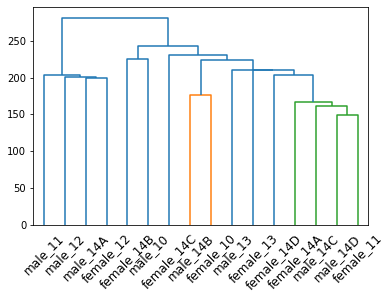

In [22]:
#make a dendrogram
fig = plt.figure()
dn = dendrogram(samplecomp,leaf_rotation=45,labels=DFfinal.columns[2:-1])
plt.show()

In [23]:
#DFARRAY to np array
b = DFARRAY.astype(np.float)

<AxesSubplot:>

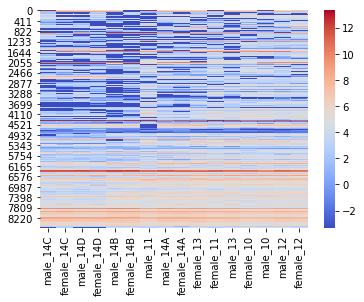

In [24]:
#build a heatmap 
sns.heatmap(b,xticklabels = list(DFfinal.columns)[2:-1],cmap = 'coolwarm')

## part 2

In [27]:
dfmath=df # Restablish the orginal data frame with log10 computed values
#transform to be usable
model_df = dfmath.T
model_df.columns = model_df.iloc[0]
model_df = model_df.iloc[2:-1]
#append discriptive coumns for analysis (serve as independant var)
stages = [10.0,11.0,12.0,13.0,14.0,14.0,14.0,14.0,10.0,11.0,12.0,13.0,14.0,14.0,14.0,14.0]
sex = ['m','m','m','m','m','m','m','m','f','f','f','f','f','f','f','f']
model_df['stage'] = stages 
model_df['sex'] = sex

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,stage,sex
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806,10.0,m
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,11.0,m
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688,12.0,m
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383,13.0,m
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,14.0,m
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,14.0,m
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,14.0,m
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,14.0,m
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295,10.0,f
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145,11.0,f


In [28]:
transcripts = model_df.columns[0:8613] #list of all transcript names

In [78]:

pvals = [] #pval subset list (no sex covarient)
sex_pvals = [] #pval subset with sex as covalient list
beta=[]
for element in transcripts:
    model_df[element] = model_df[element].astype(float) #convert dataframe into floats
    df = pd.DataFrame({'y':model_df[element], 'x':model_df['stage'], 'sex':model_df['sex']}) #define dep & indepndent variables
    model = smf.ols(formula = "y ~ x", data = df) #nosex model 
    model_sex = smf.ols(formula = "y ~ x+sex", data = df)#sex model 
    #save model results
    results = model.fit() 
    sex_results = model_sex.fit()
    #append values of slope for both and effect for sex-cov
    pvals.append(results.pvalues[1])
    sex_pvals.append(sex_results.pvalues[2])
    beta.append(sex_results.params[2])


# add pvals to original DF

In [69]:
dfmath['p'] = pvals
dfmath['sex_p'] = sex_pvals

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,p,sex_p
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,...,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,18.002343,0.735893,0.745479
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,...,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,7.408367,0.162378,0.174987
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,...,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,16.617589,0.263080,0.274123
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,...,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,51.024830,0.031521,0.018751
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,...,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,74.296821,0.221445,0.227350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,...,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,71.833485,0.049018,0.056993
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,...,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,211.546905,0.051185,0.057250
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,...,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,1913.698243,0.546605,0.560402
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,...,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.026254,0.170680,0.177894


# sort Pvals by small->large

In [72]:
pvals.sort()
sex_pvals.sort()
# logP = np.log10(pvals)
# sexlogP = np.log10(sex_pvals)
uni_points = list(range(0, len(transcripts)))
new_list = [x+1 for x in uni_points]
uni_pval = [v/len(transcripts) for v in new_list]
# uni_logp = -1 * np.log10(uni_pval)

In [73]:
sex_pvals

[6.477940958870726e-14,
 6.477940958870726e-14,
 1.140239495337146e-13,
 2.904439998653629e-11,
 1.3232272217582566e-10,
 2.581540535500103e-10,
 6.207501137803213e-10,
 1.0208846833123602e-09,
 1.3719732171123708e-09,
 1.5086878608242107e-09,
 1.7755209944994603e-09,
 1.797457680303464e-09,
 2.3459690642353276e-09,
 2.5782776853439022e-09,
 2.5786281407463735e-09,
 2.8772788612572447e-09,
 4.249725102999349e-09,
 4.533234414405838e-09,
 5.97603382016749e-09,
 6.18568624148245e-09,
 8.362787710037203e-09,
 1.0077550080985852e-08,
 1.1972766190065247e-08,
 1.2052398789835183e-08,
 1.3382154073420205e-08,
 1.3817320461371638e-08,
 1.4798724890002873e-08,
 1.84627308627745e-08,
 2.1991975162468355e-08,
 2.333486465797287e-08,
 2.3463487038057726e-08,
 2.4326562345749657e-08,
 2.5097003645979993e-08,
 2.719964916174789e-08,
 3.518097930843967e-08,
 3.562037923861448e-08,
 3.678086855071802e-08,
 4.0669110867317e-08,
 4.19489330127412e-08,
 4.468660376361247e-08,
 4.977004607126304e-08,
 5.

# plot qqplots

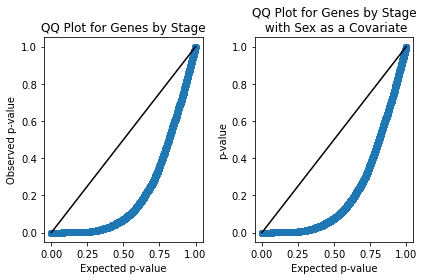

In [74]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(uni_pval, pvals)
ax[0].plot([1,0], [1, 0], color = "black")
ax[0].set_xlabel("Expected p-value")
ax[0].set_ylabel("Observed p-value")
ax[0].set_title('QQ Plot for Genes by Stage')
ax[1].scatter(uni_pval, sex_pvals)
ax[1].plot([1,0], [1, 0], color = "black")
ax[1].set_xlabel("Expected p-value")
ax[1].set_ylabel("p-value")
ax[1].set_title('QQ Plot for Genes by Stage\n with Sex as a Covariate')
fig.tight_layout()
plt.show()

# determine fdr pval using bonfaroni

In [110]:
fdr = 0.1/8613
fdr_df = dfmath[dfmath['p']<fdr]

In [116]:
nosex =list(fdr_df['gene_name'].unique())

In [71]:
fdr = 0.1/8613
fdr_df2 = dfmath[dfmath['sex_p']<fdr]
fdr_df2

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,p,sex_p
50,FBtr0078985,CG14641,6.637172,6.591033,6.890134,6.969027,7.518327,7.748548,7.948051,7.958587,...,6.690650,6.821103,6.998032,7.378962,7.438458,7.957329,7.900571,147.038753,2.027653e-06,4.087391e-06
51,FBtr0078967,abs,4.493204,4.469153,4.805691,4.852776,5.213607,5.128309,5.381846,5.374848,...,4.611015,4.616802,4.826213,5.049368,5.347315,5.549579,5.340620,30.904763,1.196870e-06,2.899826e-06
118,FBtr0078951,hkb,-3.321928,-3.321928,1.397440,2.464557,4.644593,5.561555,5.006473,5.538467,...,-3.321928,0.878577,4.046275,4.162939,6.389426,5.678492,4.450326,17.117286,6.308141e-10,2.578278e-09
145,FBtr0078921,lost,8.950860,8.438597,8.611572,7.714461,6.308582,6.067814,6.411334,6.189208,...,8.561819,8.768103,7.383055,6.252867,6.013329,6.232117,6.253672,125.919696,8.124242e-08,2.369683e-07
252,FBtr0078868,atms,6.324540,6.738620,6.639727,6.676933,7.030160,7.298943,7.268907,7.326453,...,6.787123,6.568091,6.885735,7.096944,7.189306,7.317627,7.241113,124.378601,1.359935e-06,3.302912e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33487,FBtr0301884,spir,4.454728,5.949972,3.668869,4.672742,-3.321928,-3.321928,-3.321928,-3.321928,...,3.091086,4.088608,0.534924,-3.321928,-3.321928,-3.321928,-3.321928,0.674433,5.521030e-06,9.271600e-06
33530,FBtr0273378,CG31688,2.222423,3.483737,2.048160,1.310061,-3.321928,-3.321928,-3.321928,-3.321928,...,1.543842,2.155469,0.496609,-3.321928,-3.321928,-3.321928,-3.321928,0.655447,2.450227e-06,5.239267e-06
33533,FBtr0330661,CG31688,1.139910,2.380495,0.970173,0.258363,-3.321928,-3.321928,-3.321928,-3.321928,...,0.482381,1.074632,-0.506638,-3.321928,-3.321928,-3.321928,-3.321928,0.301930,1.732566e-06,3.613478e-06
33749,FBtr0081468,CG9253,6.225869,5.891567,6.347441,6.395218,6.889825,6.919517,6.958906,6.559999,...,6.208812,6.270647,6.625183,6.729378,6.763879,6.671440,6.930382,96.433582,3.430108e-06,7.828147e-06


In [114]:
sex=list(fdr_df2['gene_name'].unique())

In [115]:
sex

['CG14641',
 'abs',
 'hkb',
 'lost',
 'atms',
 'CG1218',
 'ftz',
 'MAGE',
 'mRpS9',
 'bel',
 'CG8036',
 'hyx',
 'CG16817',
 'pont',
 'CG6293',
 'KP78b',
 'CG14715',
 'CG4702',
 'GstD3',
 'CG10035',
 'Dtg',
 'mbo',
 'Dip-B',
 'tal-AA',
 'tal-1A',
 'tal-2A',
 'tal-3A',
 'CG9926',
 'mRpL11',
 'CG14852',
 'Cys',
 'His4r',
 'CycC',
 'GlyS',
 'FK506-bp1',
 'CREG',
 'Prx3',
 'CG14317',
 '14-3-3epsilon',
 'Dlc90F',
 'Vha100-2',
 'Smu1',
 'CG14286',
 'Prp18',
 'CG11779',
 'mira',
 'ND42',
 'CG6015',
 'CG45099',
 'PyK',
 'Ublcp1',
 'ATPsyn-Cf6',
 'Sec13',
 'GILT2',
 'eIF4G2',
 'Syx18',
 'CG7006',
 'CG11781',
 'Aats-gln',
 'E(spl)malpha-BFM',
 'E(spl)m4-BFM',
 'E(spl)m7-HLH',
 'His2Av',
 'Rb97D',
 'CG5880',
 'Inx3',
 'yem',
 'Obp99a',
 'IntS11',
 'aralar1',
 'tll',
 'CstF-50',
 'CG17249',
 'CG7970',
 'CG12024',
 'CG8960',
 'CG1291',
 'CG12034',
 'Sucb',
 'spo',
 'CG5537',
 'CG13298',
 'CG9953',
 'BI-1',
 'mtrm',
 'GstO2',
 'Cdc6',
 'Srp68',
 'Pdxk',
 'CG4447',
 'Hsp26',
 'Hsp27',
 'Ilp4',
 'iPLA2

# %overlap

In [121]:
setA = set(nosex)
setB = set(sex)
overlap = setA & setB
universe = setA | setB
result = float(len(overlap)) / len(universe) * 100
result

78.01608579088472

# VOLCANO PLOT

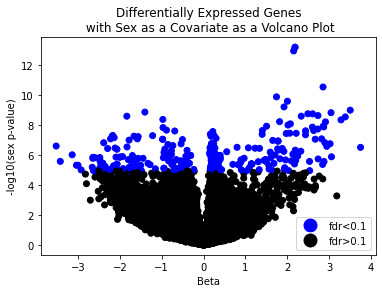

In [109]:
from matplotlib.lines import Line2D
# custom janky legend!
legend_elements = [Line2D([0], [0], marker='o', color='w', label='fdr<0.1',
                          markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='fdr>0.1',
                          markerfacecolor='black', markersize=15)]

x =beta
y = -1*np.log10(dfmath['sex_p'])
fig,ax = plt.subplots()
colors = []
for pval in dfmath['sex_p']:
    if pval<fdr:
        colors.append('b') 
    else:
        colors.append('k') 
ax.scatter(x, y, color = colors)
ax.set_title('Differentially Expressed Genes\n with Sex as a Covariate as a Volcano Plot')
ax.set_xlabel('Beta')
ax.set_ylabel('-log10(sex p-value)')
ax.legend(handles=legend_elements, loc='lower right')
plt.show()

# create text file with all genes that are differentailly expressed

In [127]:

with open('diffexpressedgenes.txt', 'w') as f:
    for item in overlap:
        f.write("%s\n" %item)
f.close()

# create text file /w %overlap

In [134]:
b = open('percentoverlap.txt', 'w')
b.write('% overlap = 78.01608579088472')
b.close()